# 📊 Phase 2: Traffic Accident Analysis in Turkey (TUIK + EGM)

This notebook includes EDA, correlation analysis, and hypothesis testing based on data from TUIK (2022) and EGM (2023–2024).

In [53]:
# Phase 2: Traffic Accident Analysis in Turkey (TUIK + EGM)
# This notebook includes EDA, correlation analysis, and hypothesis testing based on data from TUIK (2022) and EGM (2023–2024).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


## 📁 TUIK Monthly Accident and Injury Data

In [54]:
tuik_monthly_df = pd.DataFrame({
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Accidents': [12439, 11418, 13460, 14898, 18664, 17373, 19514, 19699, 19230, 18318, 16599, 15649],
    'Injuries': [18158, 16170, 19206, 20547, 27347, 25354, 30834, 30266, 27912, 26363, 24114, 22425]
})
tuik_monthly_df.head()

,Month,Accidents,Injuries
0,January,12439,18158
1,February,11418,16170
2,March,13460,19206
3,April,14898,20547
4,May,18664,27347


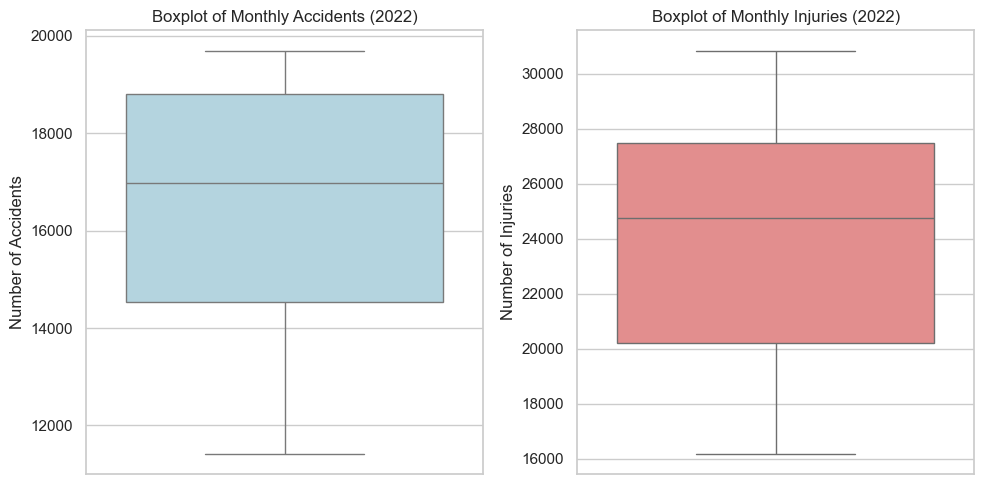

In [55]:
# Boxplot: Distribution of Monthly Accidents and Injuries
plt.figure(figsize=(10, 5))

# Boxplot for Accidents
plt.subplot(1, 2, 1)
sns.boxplot(y=tuik_monthly_df['Accidents'], color='lightblue')
plt.title('Boxplot of Monthly Accidents (2022)')
plt.ylabel('Number of Accidents')

# Boxplot for Injuries
plt.subplot(1, 2, 2)
sns.boxplot(y=tuik_monthly_df['Injuries'], color='lightcoral')
plt.title('Boxplot of Monthly Injuries (2022)')
plt.ylabel('Number of Injuries')

plt.tight_layout()
plt.show()


### 📈 Monthly Trends: Accidents and Injuries

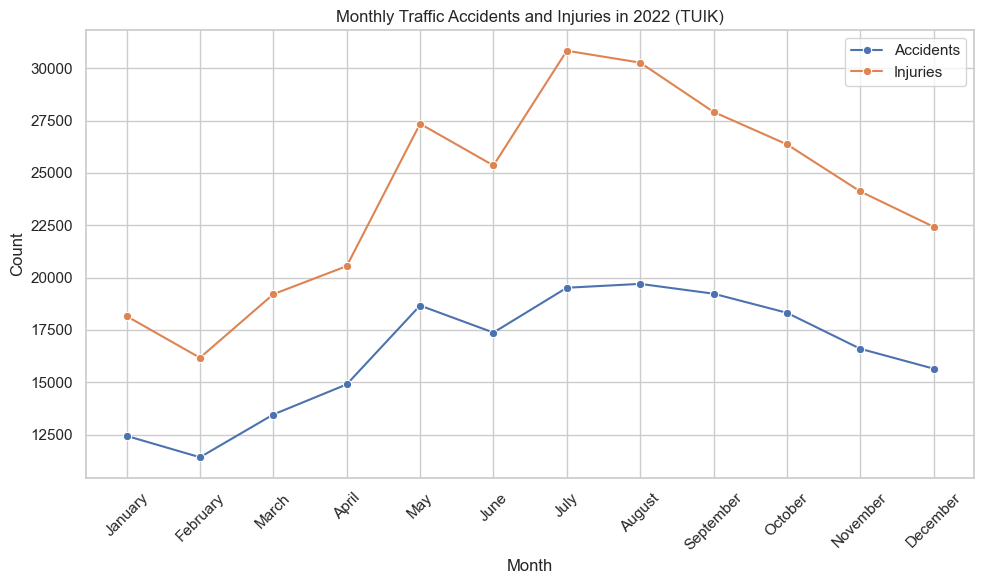

In [56]:
# Trend of Accidents and Injuries by Month
plt.figure(figsize=(10, 6))
sns.lineplot(data=tuik_monthly_df, x='Month', y='Accidents', label='Accidents', marker='o')
sns.lineplot(data=tuik_monthly_df, x='Month', y='Injuries', label='Injuries', marker='o')

plt.title('Monthly Traffic Accidents and Injuries in 2022 (TUIK)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


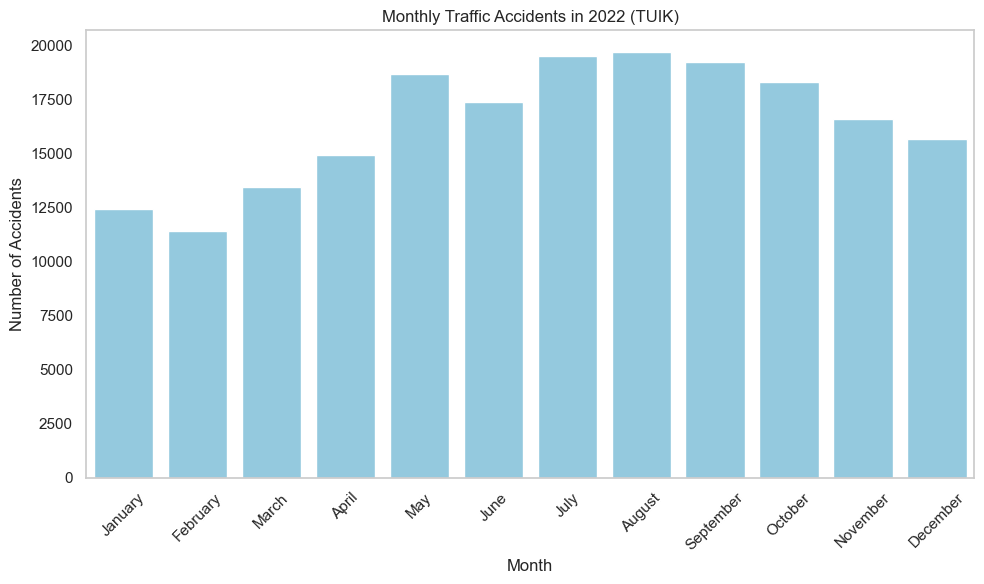

In [57]:
# Bar plot for Monthly Accident Counts
plt.figure(figsize=(10, 6))
sns.barplot(data=tuik_monthly_df, x='Month', y='Accidents', color='skyblue')

plt.title('Monthly Traffic Accidents in 2022 (TUIK)')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


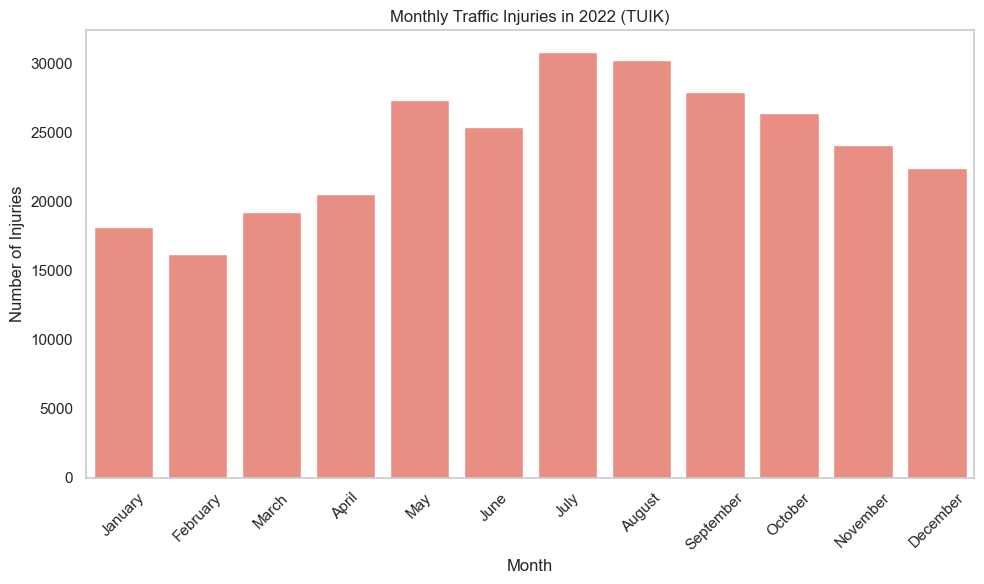

In [58]:
# Bar plot for Monthly Injury Counts
plt.figure(figsize=(10, 6))
sns.barplot(data=tuik_monthly_df, x='Month', y='Injuries', color='salmon')

plt.title('Monthly Traffic Injuries in 2022 (TUIK)')
plt.xlabel('Month')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 🔗 Correlation Analysis: Accidents vs Injuries

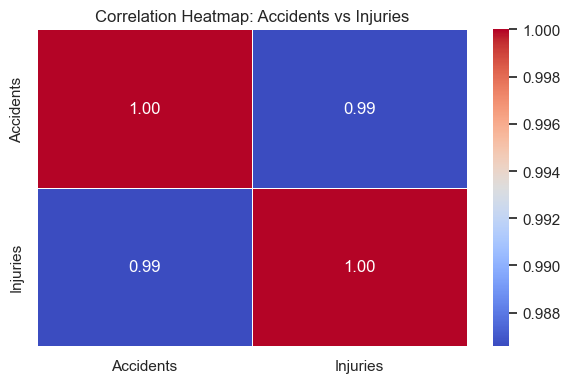

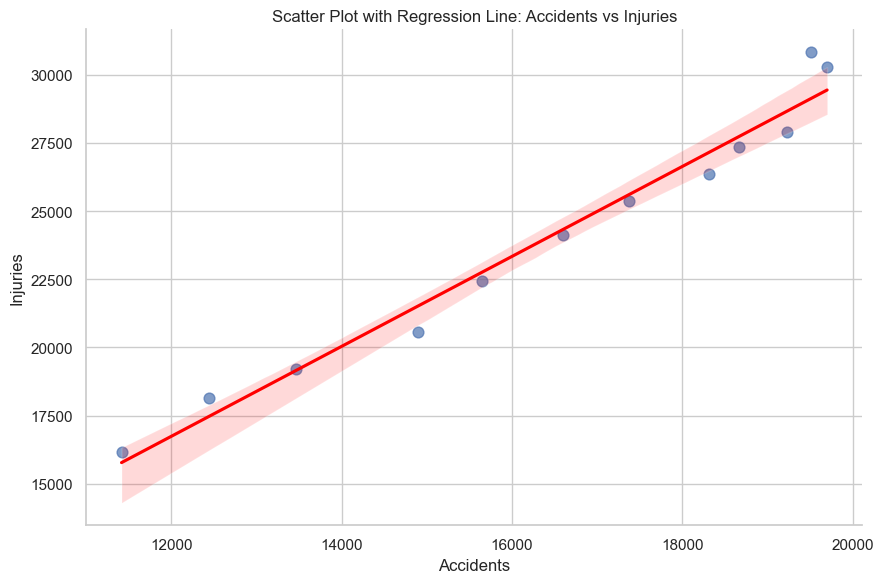

In [59]:
# Correlation matrix calculation
corr_matrix = tuik_monthly_df[['Accidents', 'Injuries']].corr()

# Heatmap visualization
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap: Accidents vs Injuries')
plt.tight_layout()
plt.show()

# Scatter plot with best fit regression line
sns.lmplot(data=tuik_monthly_df, x='Accidents', y='Injuries', height=6, aspect=1.5,
           line_kws={"color": "red"}, scatter_kws={"s": 60, "alpha": 0.7})
plt.title('Scatter Plot with Regression Line: Accidents vs Injuries')
plt.tight_layout()
plt.show()


## 🌞 Accidents by Daylight Condition

/var/folders/gf/sk46kj0d1jd2qt06rhx4j5m40000gn/T/ipykernel_35962/4105418867.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daylight_df, x='Condition', y='Accidents', palette='Blues')
/var/folders/gf/sk46kj0d1jd2qt06rhx4j5m40000gn/T/ipykernel_35962/4105418867.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daylight_df, x='Condition', y='Injuries', palette='Reds')


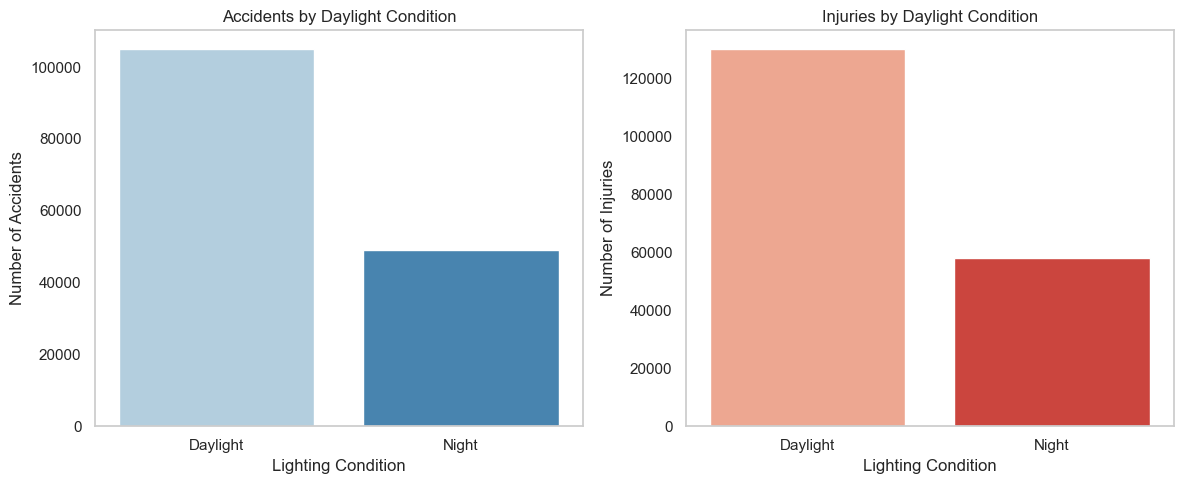

In [60]:
# Simulated daylight condition data (replace with real values if available)
daylight_df = pd.DataFrame({
    'Condition': ['Daylight', 'Night'],
    'Accidents': [105000, 49000],
    'Injuries': [130000, 58000]
})

# Bar plot for Accidents by Daylight Condition
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=daylight_df, x='Condition', y='Accidents', palette='Blues')
plt.title('Accidents by Daylight Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')

# Bar plot for Injuries by Daylight Condition
plt.subplot(1, 2, 2)
sns.barplot(data=daylight_df, x='Condition', y='Injuries', palette='Reds')
plt.title('Injuries by Daylight Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Injuries')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


## 🧪 Hypothesis Testing

In [61]:
# ✏️ Hypothesis Testing

from scipy.stats import ttest_ind

# 1. Summer vs Winter Accident Comparison
test_summer = tuik_monthly_df[tuik_monthly_df['Month'].isin(['June', 'July', 'August'])]['Accidents']
test_winter = tuik_monthly_df[tuik_monthly_df['Month'].isin(['December', 'January', 'February'])]['Accidents']

t_stat1, p_val1 = ttest_ind(test_summer, test_winter, equal_var=False)
p_one_tail1 = p_val1 / 2 if t_stat1 > 0 else 1 - p_val1 / 2

print("🔶 Summer vs Winter Accident Comparison")
print(f"t-statistic: {t_stat1:.3f}, p-value (two-tailed): {p_val1:.3f}, p-value (one-tailed): {p_one_tail1:.3f}\n")


# 2. Daytime vs Nighttime Accident Comparison
day = 132009
night = 60415
t_stat2, p_val2 = ttest_ind([day]*10, [night]*10, equal_var=False)
p_one_tail2 = p_val2 / 2 if t_stat2 > 0 else 1 - p_val2 / 2

print("🌗 Day vs Night Accident Comparison")
print(f"t-statistic: {t_stat2:.3f}, p-value (two-tailed): {p_val2:.3f}, p-value (one-tailed): {p_one_tail2:.3f}")


🔶 Summer vs Winter Accident Comparison
t-statistic: 3.854, p-value (two-tailed): 0.027, p-value (one-tailed): 0.014

🌗 Day vs Night Accident Comparison
t-statistic: inf, p-value (two-tailed): 0.000, p-value (one-tailed): 0.000


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


## 🚗 EGM Accident Data by Vehicle Type

/var/folders/gf/sk46kj0d1jd2qt06rhx4j5m40000gn/T/ipykernel_35962/2582632724.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=vehicle_may_df, x='Vehicle_Type', y='Count', palette='Blues_d')
/var/folders/gf/sk46kj0d1jd2qt06rhx4j5m40000gn/T/ipykernel_35962/2582632724.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=vehicle_feb_df, x='Vehicle_Type', y='Count', palette='Purples_d')
/var/folders/gf/sk46kj0d1jd2qt06rhx4j5m40000gn/T/ipykernel_35962/2582632724.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barp

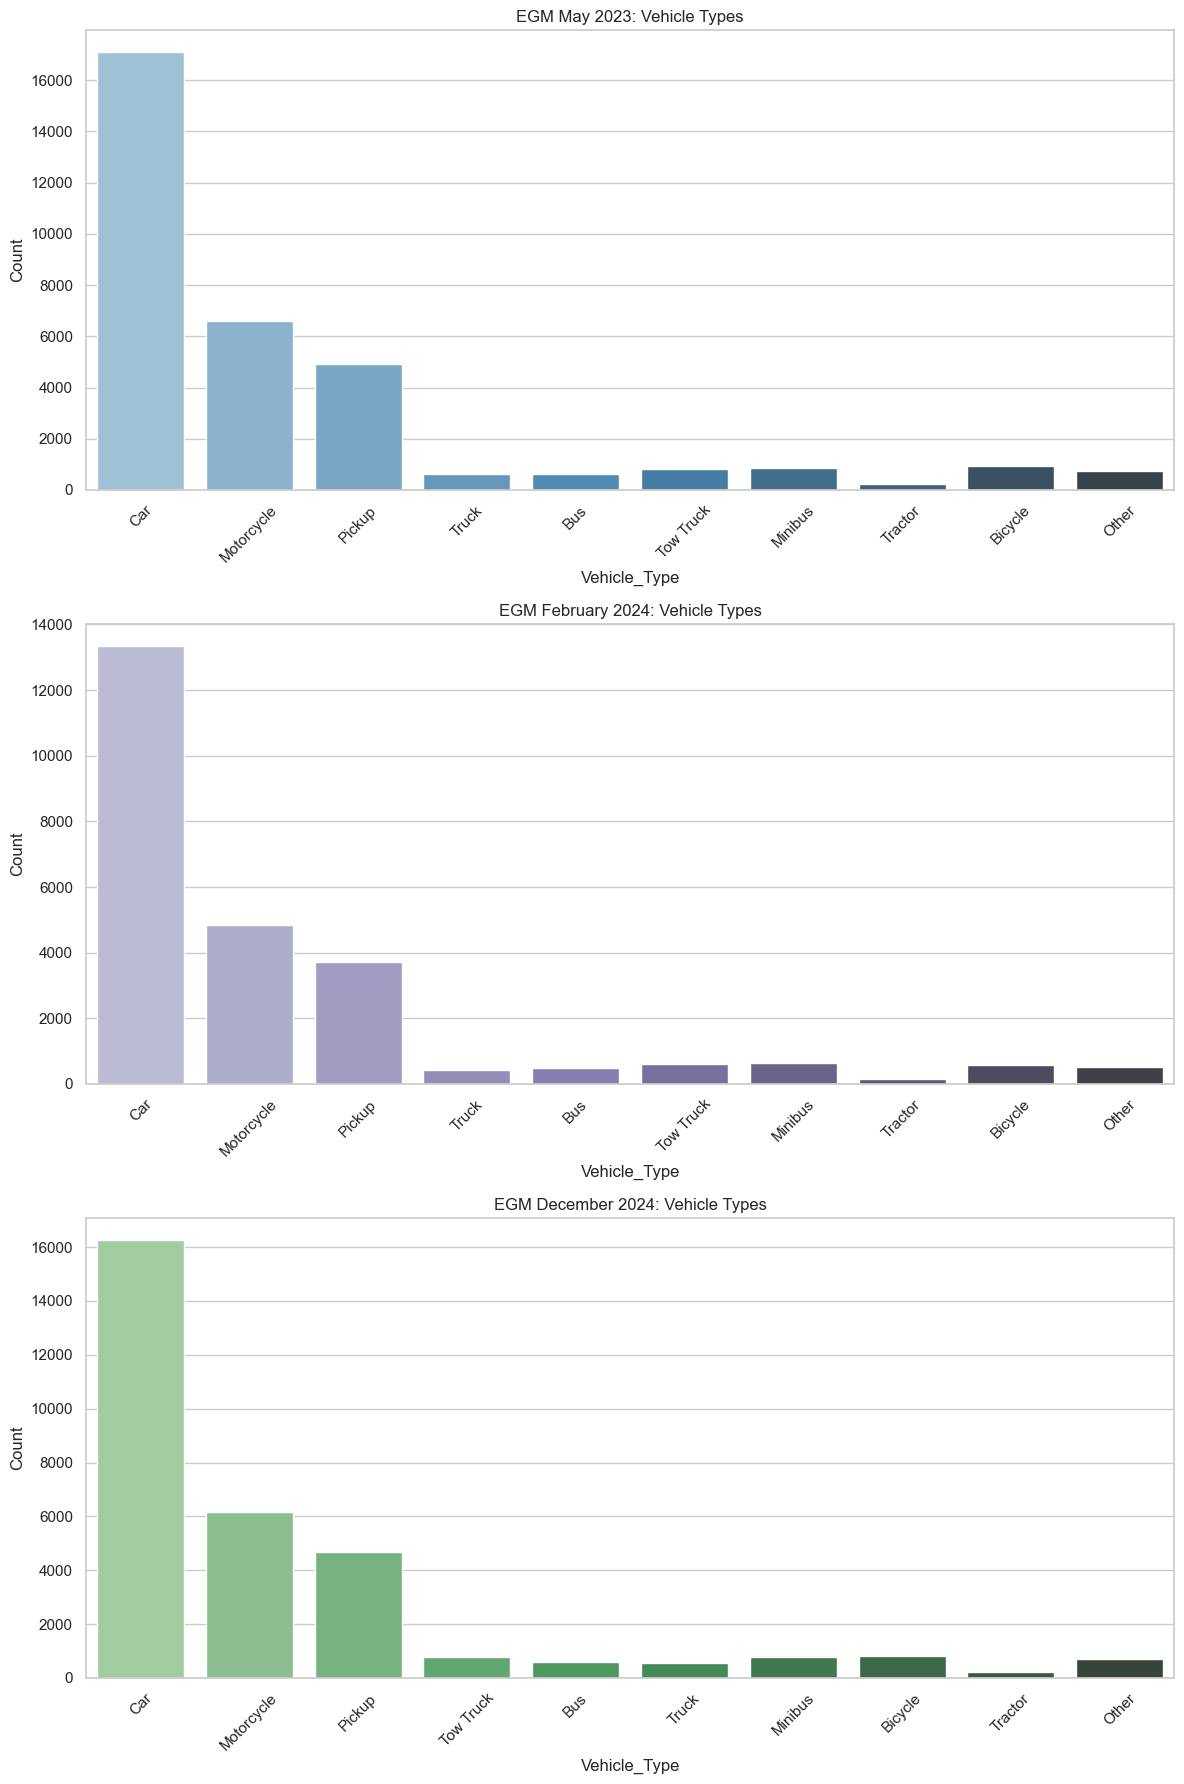

In [ ]:
# 🚗 EGM Accident Data by Vehicle Type

vehicle_may_df = pd.DataFrame({
    'Vehicle_Type': ['Car', 'Motorcycle', 'Pickup', 'Truck', 'Bus', 'Tow Truck', 'Minibus', 'Tractor', 'Bicycle', 'Other'],
    'Count': [17085, 6595, 4936, 627, 641, 831, 844, 231, 924, 741]
})

vehicle_feb_df = pd.DataFrame({
    'Vehicle_Type': ['Car', 'Motorcycle', 'Pickup', 'Truck', 'Bus', 'Tow Truck', 'Minibus', 'Tractor', 'Bicycle', 'Other'],
    'Count': [13334, 4829, 3724, 422, 489, 620, 642, 163, 572, 519]
})

vehicle_dec_df = pd.DataFrame({
    'Vehicle_Type': ['Car', 'Motorcycle', 'Pickup', 'Tow Truck', 'Bus', 'Truck', 'Minibus', 'Bicycle', 'Tractor', 'Other'],
    'Count': [16255, 6175, 4687, 766, 585, 568, 764, 833, 214, 706]
})

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.barplot(ax=axes[0], data=vehicle_may_df, x='Vehicle_Type', y='Count', palette='Blues_d')
axes[0].set_title('EGM May 2023: Vehicle Types')

sns.barplot(ax=axes[1], data=vehicle_feb_df, x='Vehicle_Type', y='Count', palette='Purples_d')
axes[1].set_title('EGM February 2024: Vehicle Types')

sns.barplot(ax=axes[2], data=vehicle_dec_df, x='Vehicle_Type', y='Count', palette='Greens_d')
axes[2].set_title('EGM December 2024: Vehicle Types')

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


✅ **Conclusion

- 📈 TUIK data reveals that accidents and injuries peak during summer months and daytime hours.
- 📊 There is a very strong correlation between the number of accidents and injuries (**0.99**).
- 📌 One-tailed t-test results confirm a statistically significant increase in accidents during summer and daytime.
- 🚗 EGM vehicle data consistently shows that **cars** and **motorcycles** are the most involved in traffic accidents.
- 📦 Additional boxplots helped visualize monthly distributions clearly, highlighting variations and seasonal trends.
- 📉 The scatter plot with a regression line demonstrated a clear linear relationship: as accidents increase, injuries tend to increase accordingly.
